In [1]:
import rastereasy


# Adapting spectral bands with optimal transport

Read images, info and plot them

Here, for the example, `image1` and `image2` are obtained by `asyraster.files2stack` but they can simply be obtained by 
`image1=rastereasy.Geoimage(name1)` and `image2=rastereasy.Geoimage(name2)` 

In [2]:
image1=rastereasy.files2stack('./data/demo/sentinel/copacabana_ipanema_synthesis/202406/',resolution=10,ext='tif')
image2=rastereasy.files2stack('./data/demo/sentinel/finistere_synthesis/202405/',resolution=10,ext='tif')
image1.info()
image2.info()

- Size of the image:
   - Rows (height): 369
   - Cols (width): 467
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (-22.97848940, -43.19246031)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32723
- Nodata: -32768.0

- Given names for spectral bands: 
   {'B01': 1, 'B02': 2, 'B03': 3, 'B04': 4, 'B05': 5, 'B06': 6, 'B07': 7, 'B08': 8, 'B09': 9, 'B11': 10, 'B12': 11, 'B8A': 12}


- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32630
- Nodata: -32768.0

- Given names for spectral bands: 
   {'B01': 1, 'B02': 2, 'B03': 3, 'B04': 4, 'B05': 5, 'B06': 6, 'B07': 7, 'B08': 8, 'B09': 9, 'B11': 10, 'B12': 11, 'B8A': 12}




<Figure size 640x480 with 0 Axes>

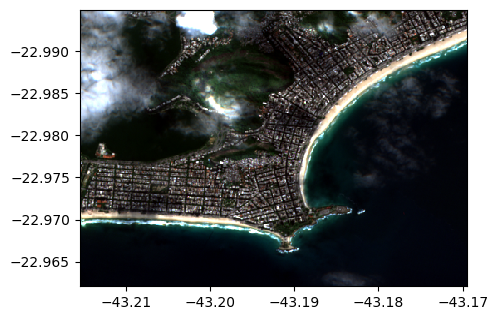

<Figure size 640x480 with 0 Axes>

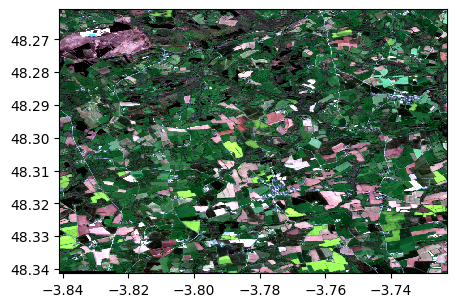

In [3]:
image1.colorcomp(['B04','B03','B02'])
image2.colorcomp(['B04','B03','B02'])


Domain adaptation. Two possibilities : 


1. return an adapted image (`image1.adapt` function)
2. directly modify the image (`image1.adapt` function with `inplace=True` option)

In [4]:
help(image1.adapt)

Help on method adapt in module rastereasy.rastereasy:

adapt(
    imt,
    tab_source=None,
    nb=1000,
    mapping='gaussian',
    reg_e=0.1,
    mu=1.0,
    eta=0.01,
    bias=False,
    max_iter=20,
    verbose=True,
    sigma=1,
    inplace=False
) method of rastereasy.rastereasy.Geoimage instance
    Adjust spectral characteristics to match a target image (in-place).

    This method adapts the spectral characteristics of the current image to match
    those of a target image using optimal transport methods. This is useful for
    harmonizing images from different sensors or acquisitions.

    Parameters
    ----------
    imt : Geoimage or numpy.ndarray
        Target image serving as a reference for spectral adjustment,
        or a NumPy array of shape (N, bands) containing N spectral samples.
    tab_source : numpy.ndarray, optional
        Required if `imt` is a NumPy array. Must be an array of shape (M, bands)
        containing spectral samples from the source image.
    n

# 1) Adaptation

In [5]:
image1_adapted = image1.adapt(image2,mapping='sinkhorn')


Fitting transport model using sinkhorn method...


/Users/corpetti/miniforge3/envs/test_re/lib/python3.13/site-packages/ot/backend.py:1165: RuntimeWarning: overflow encountered in exp
  return np.exp(a)


Transforming data...
Adaptation complete.


<Figure size 640x480 with 0 Axes>

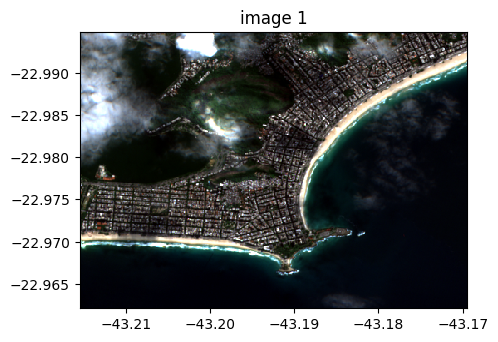

<Figure size 640x480 with 0 Axes>

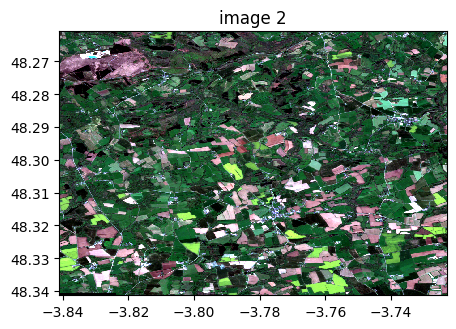

<Figure size 640x480 with 0 Axes>

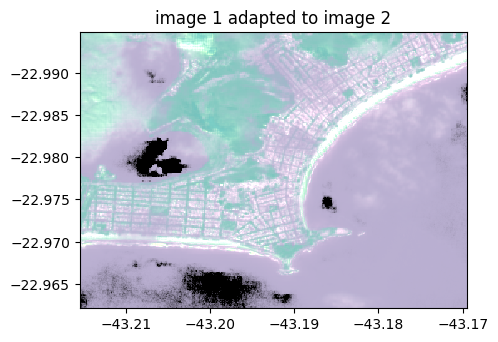

np.float64(2544994442.9184103)

In [6]:
image1.colorcomp(['B04','B03','B02'],title = 'image 1')
image2.colorcomp(['B04','B03','B02'],title = 'image 2')
image1_adapted.colorcomp(['B04','B03','B02'],title='image 1 adapted to image 2')
image1_adapted.save('adapt.tif')
(image1_adapted-image1).abs().sum()

<Figure size 640x480 with 0 Axes>

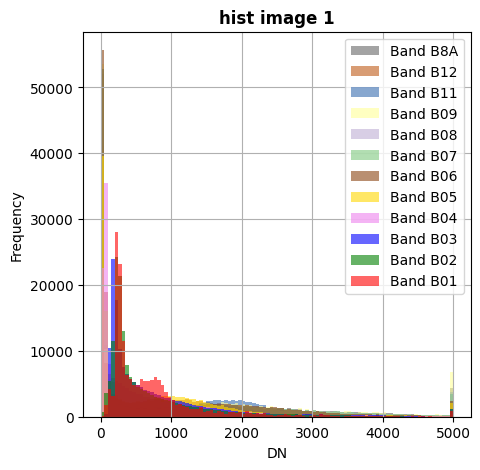

<Figure size 640x480 with 0 Axes>

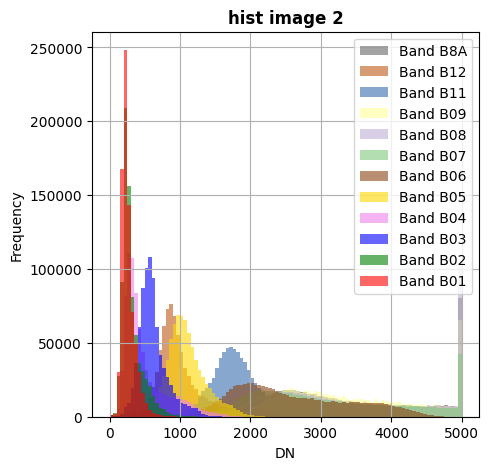

<Figure size 640x480 with 0 Axes>

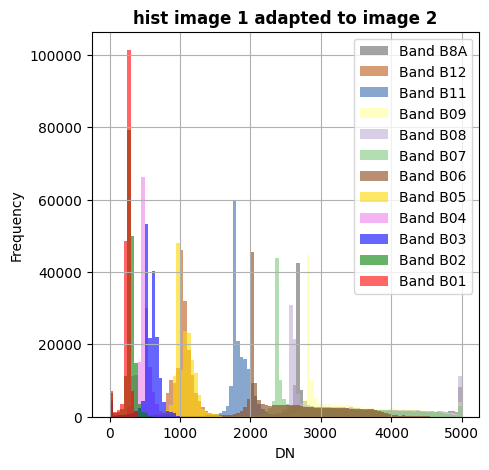

In [7]:
image1.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1')
image2.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 2')
image1_adapted.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 adapted to image 2')


# 2) By modifying the image directly `inplace=True` option

<Figure size 640x480 with 0 Axes>

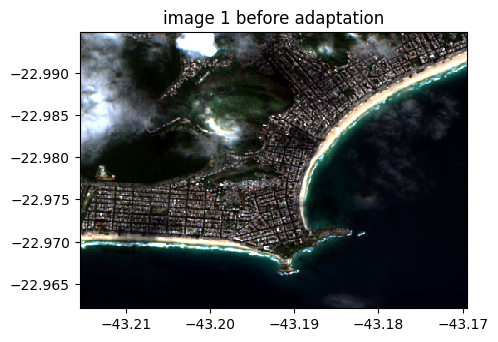

<Figure size 640x480 with 0 Axes>

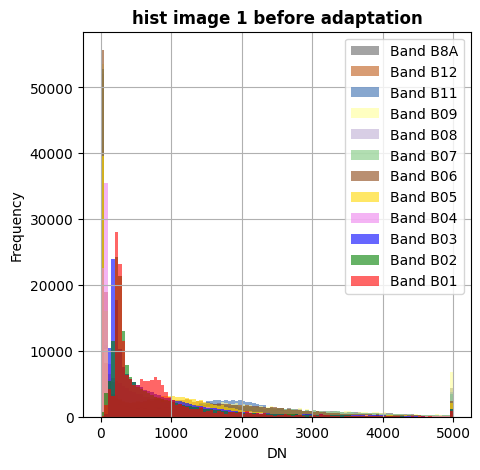

In [8]:
image1.colorcomp(['B04','B03','B02'],title='image 1 before adaptation')
image1.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 before adaptation')


In [9]:
image1.adapt(image2,mapping='sinkhorn',inplace=True)


Fitting transport model using sinkhorn method...


/Users/corpetti/miniforge3/envs/test_re/lib/python3.13/site-packages/ot/backend.py:1165: RuntimeWarning: overflow encountered in exp
  return np.exp(a)


Transforming data...
Adaptation complete.


<Figure size 640x480 with 0 Axes>

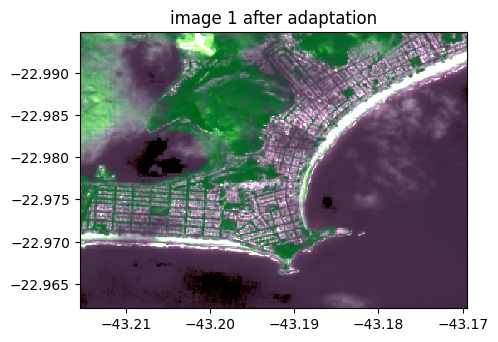

<Figure size 640x480 with 0 Axes>

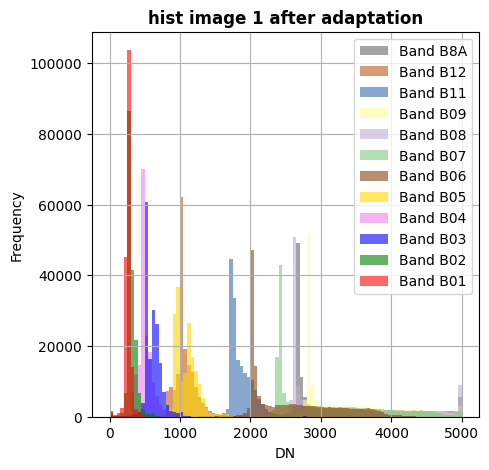

In [10]:
image1.colorcomp(['B04','B03','B02'],title='image 1 after adaptation')
image1.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 after adaptation')


# 2) By manually selecting the samples

In [26]:
image1=rastereasy.files2stack('./data/demo/sentinel/copacabana_ipanema_synthesis/202406/',resolution=10,ext='tif')
image2=rastereasy.files2stack('./data/demo/sentinel/finistere_synthesis/202405/',resolution=10,ext='tif')


Label(value='Click on the image to retrieve spectra.')

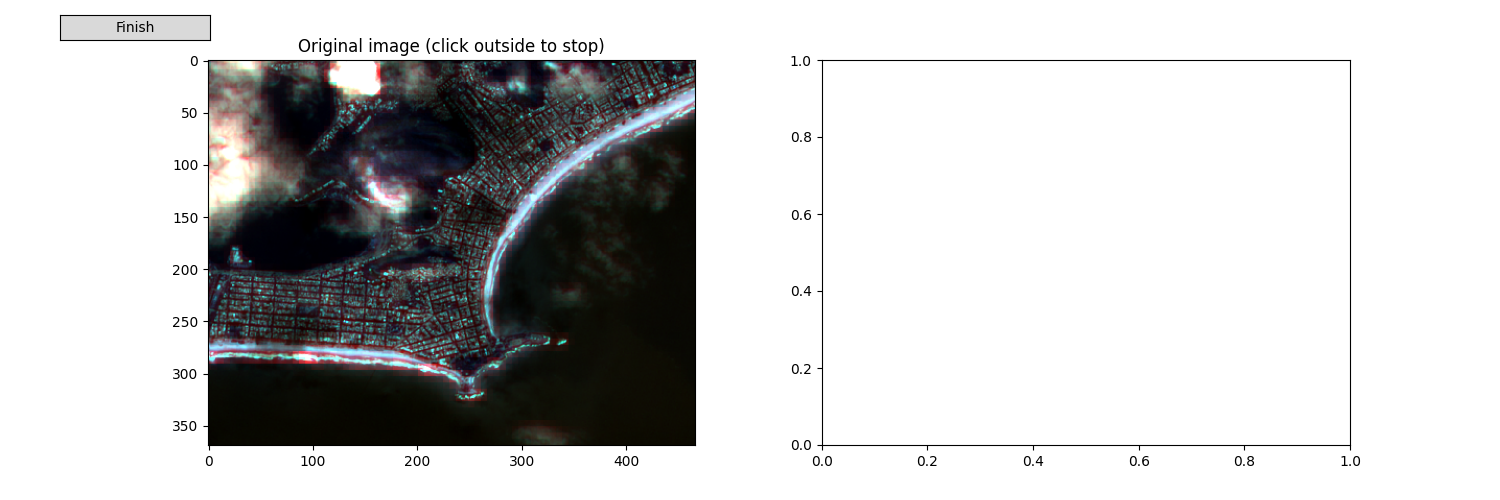

In [27]:
samples_source,_,_=image1.plot_spectra()

Label(value='Click on the image to retrieve spectra.')

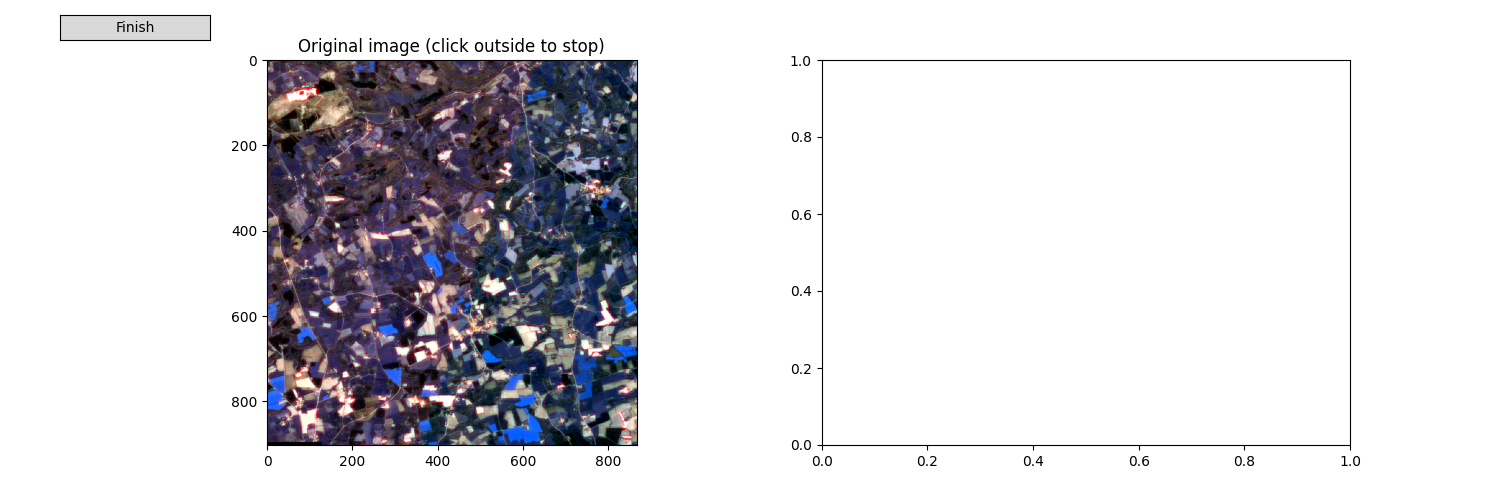

In [28]:
samples_target,_,_=image2.plot_spectra()

In [29]:
print('size of sample source = ',len(samples_source))
print('size of sample target = ',len(samples_target))

size of sample source =  54
size of sample target =  44


In [30]:
import numpy as np


In [31]:
image1_adapted = image1.adapt(np.array(samples_target),np.array(samples_source),mapping='sinkhorn')


Fitting transport model using sinkhorn method...
Transforming data...
Adaptation complete.


/Users/corpetti/miniforge3/envs/test_re/lib/python3.13/site-packages/ot/da.py:1366: RuntimeWarning: invalid value encountered in divide
  transp_Xs_ = nx.dot(K, self.xt_) / nx.sum(K, axis=1)[:, None]


/Users/corpetti/miniforge3/envs/test_re/lib/python3.13/site-packages/rastereasy/utils.py:225: RuntimeWarning: invalid value encountered in cast
  return (255.*np.clip((band.astype(np.float64)-min)/(max-min).astype(np.float64),0.,1.)).astype(np.uint8)


<Figure size 640x480 with 0 Axes>

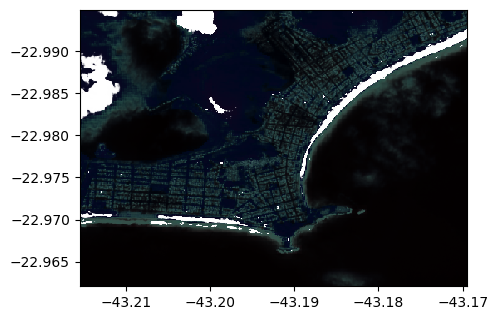

In [32]:
image1_adapted.colorcomp()

<Figure size 640x480 with 0 Axes>

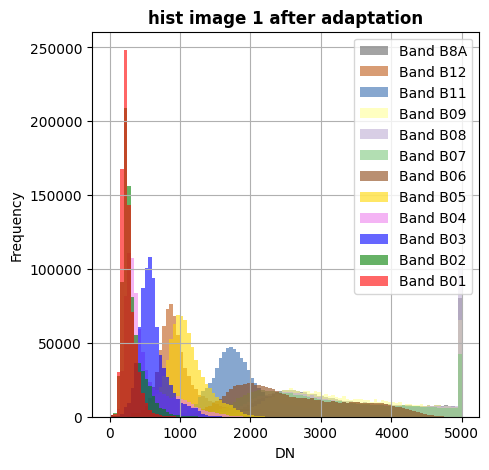

<Figure size 640x480 with 0 Axes>

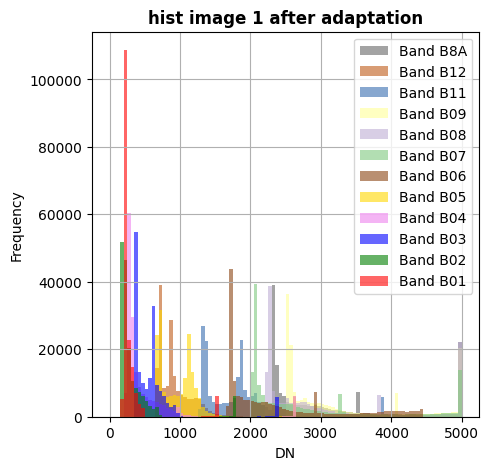

In [33]:
image2.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 after adaptation')
image1_adapted.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 after adaptation')


Label(value='Click on the image to retrieve spectra.')

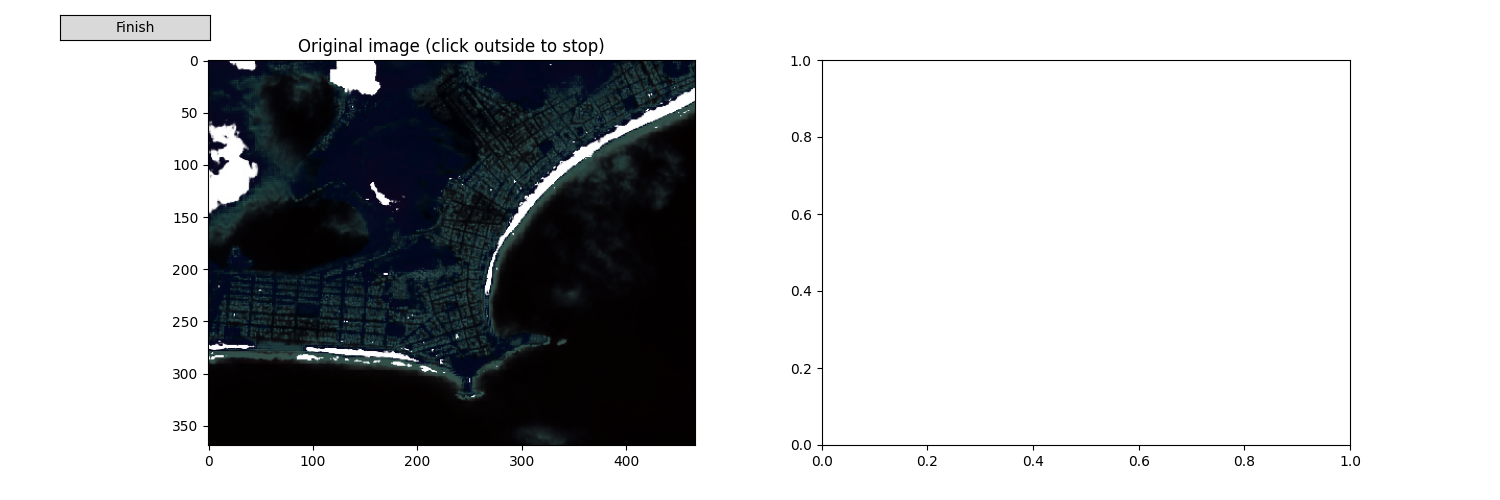

([], [], [])

In [34]:
image1_adapted.plot_spectra()